In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_030dd8fb0c25403690682aa8db070d64 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_030dd8fb0c25403690682aa8db070d64 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_030dd8fb0c25403690682aa8db070d64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DS19je96JUU_qTWYt6Je1l9CK7OJVG3Z_1WnlnS11_sd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_030dd8fb0c25403690682aa8db070d64)

body = client_030dd8fb0c25403690682aa8db070d64.get_object(Bucket='sample-donotdelete-pr-itzcgurvbrwecb',Key='avocado.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### The Below graph can be seen as the dates are overlapping
This happens when the pandas isn't realizing the "Date". It's presuming as anyother value, we need to mention this.

<AxesSubplot:xlabel='Date'>

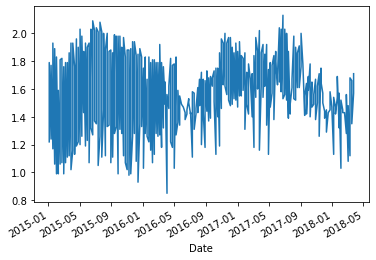

In [14]:
df["Date"] = pd.to_datetime(df['Date']) #This change the data type to datetime.
albany_df = df[df['region']=='Albany']
albany_df.set_index("Date",inplace=True)
albany_df['AveragePrice'].plot()

### Here We are doing the rolling average (Checkout google for def)
We can encouter seeing that graph is totally messed up it might be because the date are in decreasing order.We can slove this problem by sorting the index column

<AxesSubplot:xlabel='Date'>

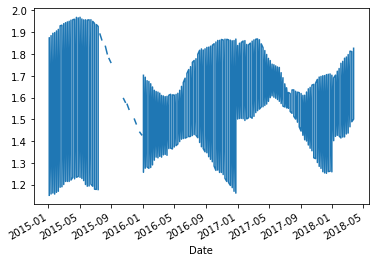

In [15]:
albany_df['AveragePrice'].rolling(25).mean().plot()

### Now We tried to sort the index we can see the results

<AxesSubplot:xlabel='Date'>

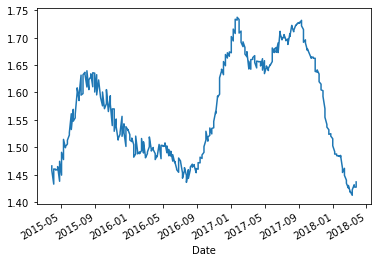

In [21]:
albany_df.sort_index(inplace=True)
albany_df["AveragePrice"].rolling(25).mean().plot()

### Now  we are trying assing the condition new column
Now pandas returns an error. This error is likely to be happend in the future as the pandas is presuming. It means that if the values in the future data set are changed there might occur a problem.So without creating problem to the existing DataFrame, we can make copy of that data and run over analysis.

In [23]:
albany_df["price25ma"] = albany_df['AveragePrice'].rolling(25).mean()

<ipython-input-23-846a1c1abe14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df["price25ma"] = albany_df['AveragePrice'].rolling(25).mean()


Here we get to see that the values of the newley assigned values are to be "NA"
***
So, why does this happen? because the we were using rolling function which takes the set of numbers.We can see the values in the new column after the 25th index.

In [24]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN


In [25]:
albany_df.tail() # we can see that the values are assigned for the new column.

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


We can drop the rows with missing values with **dropna** Function

In [26]:
albany_df.dropna().head(3)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328


### Here We created a copy of the data set
This copy of the data set will be used to perform analysis with distrubing the orginal dataset.

In [30]:
albany_df = df.copy()[df['region']=="Albany"]
albany_df.set_index("Date",inplace=True)
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

# To retrive all the unique values in a cloumn we can use "Unique" Function

In [34]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### The below code just creates the new DataFrame with regions as Columns and the index values as the date, the values will be the rolling mean of the AveragePrice of that Particular Region.

In [41]:
df = df.copy()[df['type']=='organic'] #Creates the copy of the existing data set
df['Date'] = pd.to_datetime(df['Date']) #Changing the Date column data type to "Datetime"


df.sort_values(by="Date",ascending=True,inplace=True) #This will sort the values of the Date column

graph_df = pd.DataFrame() #Creating empty dataframe

for region in df['region'].unique():              #for loop for uniqe elements in the region column
    print(region)                                 #prints the region
    region_df = df.copy()[df['region']==region]   #This creates new copy of the particular column with region and defines to an variable
    region_df.set_index("Date",inplace=True)      # In that new variable, the date column is set as index
    region_df.sort_index(inplace=True)            # The same way we are sorting the data column
    region_df[f'{region}_price25ma'] =region_df['AveragePrice'].rolling(25).mean()     # This makes the columns filled with the values of the AveragePrice rolling mean
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]     #This entire column is to just integrate the data in the region_df to graph_df
    else:
        graph_df =graph_df.join(region_df[f'{region}_price25ma'])
graph_df.tail()

California
HartfordSpringfield
Charlotte
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Louisville
Orlando
Southeast
Syracuse
Boston
West
StLouis
BaltimoreWashington
Midsouth
Atlanta
Tampa
Nashville
TotalUS
MiamiFtLauderdale
WestTexNewMexico
Northeast
NorthernNewEngland
GrandRapids
Jacksonville
NewOrleansMobile
Boise
Sacramento
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
Pittsburgh
RaleighGreensboro
Seattle
CincinnatiDayton
SanFrancisco
SouthCarolina
Indianapolis
HarrisburgScranton
Houston
Chicago
Columbus
Plains
Albany
Detroit
Portland
NewYork
SouthCentral


,California_price25ma,HartfordSpringfield_price25ma,Charlotte_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Louisville_price25ma,...,HarrisburgScranton_price25ma,Houston_price25ma,Chicago_price25ma,Columbus_price25ma,Plains_price25ma,Albany_price25ma,Detroit_price25ma,Portland_price25ma,NewYork_price25ma,SouthCentral_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9408,2.0548,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7044,...,1.5004,1.6132,1.8160,1.6064,1.8116,1.5112,1.4980,2.0144,1.9308,1.5728
2018-03-04,1.8876,1.9336,2.0180,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.6816,...,1.4972,1.5960,1.8024,1.5804,1.7900,1.4992,1.4692,1.9636,1.9156,1.5592
2018-03-11,1.8636,1.9412,1.9764,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.6508,...,1.4956,1.5696,1.7836,1.5496,1.7672,1.5044,1.4444,1.9192,1.9092,1.5400
2018-03-18,1.8516,1.9436,1.9444,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.6176,...,1.4956,1.5360,1.7732,1.5088,1.7452,1.5140,1.4092,1.8780,1.8948,1.5204
2018-03-25,1.8364,1.9448,1.9024,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.5844,...,1.4900,1.5128,1.7672,1.4848,1.7232,1.5188,1.3964,1.8300,1.8876,1.5072


<AxesSubplot:xlabel='Date'>

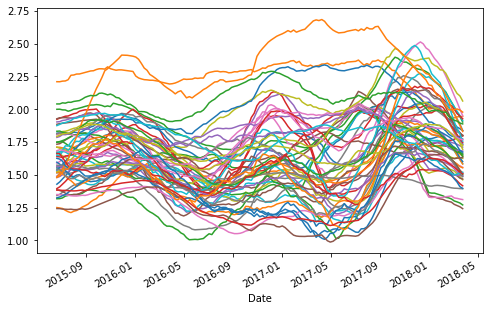

In [44]:
graph_df.dropna().plot(figsize=(8,5), legend = False) #legend will be guide defineing the lines
#figsize is the dimensions of the picture